# MasterLive Mestre Power BI Dashboard do ZERO para Varejo com Análises Avançadas

https://www.youtube.com/watch?v=DeGpb8CwOwI

In [1]:
import pandas as pd

In [2]:
#Tabela de vendas
df_vendas = pd.read_excel('BaseDados.xlsx', sheet_name='Vendas', skiprows=2)
df_vendas.sample(5)

,Data,ProdutoID,CategoriaID,Quantidade,Desconto,Status,Loja,SexoCliente,IdadeCliente
36019,2019-10-15,79,2,1,0.0,Returned,2/Rio de Janeiro/RJ,Homem,40
24736,2019-03-14,58,3,1,0.0,Sold,1/Florianópolis/SC,Homem,36
30951,2019-07-11,25,1,1,0.0,Sold,3/Porto Alegre/RS,Homem,24
23353,2019-02-16,26,1,1,0.1,Sold,1/Florianópolis/SC,Homem,37
39187,2019-12-18,88,2,1,0.0,Sold,1/Florianópolis/SC,Homem,38


In [3]:
#extrair dataframe de loja
df_loja = df_vendas['Loja'].str.split('/', expand=True).drop_duplicates().reset_index(drop=True)

In [4]:
df_loja.rename(columns={0: 'LojaID', 1:'Cidade', 2:'Estado'})

,LojaID,Cidade,Estado
0,3,Porto Alegre,RS
1,5,Recife,PE
2,7,São Paulo,SP
3,4,Curitiba,PR
4,1,Florianópolis,SC
5,2,Rio de Janeiro,RJ
6,6,Fortaleza,CE
7,9,Belo Horizonte,BH
8,22,Online,na


In [5]:
df_vendas['Loja'] = df_vendas['Loja'].apply(lambda x: x.split('/')[0])

In [6]:
df_vendas.head()

,Data,ProdutoID,CategoriaID,Quantidade,Desconto,Status,Loja,SexoCliente,IdadeCliente
0,2018-03-01,68,2,1,0.00,Sold,3,Homem,37
1,2018-03-01,24,1,1,0.00,Returned,5,Homem,62
2,2018-03-01,30,1,1,0.00,Sold,7,Homem,41
3,2018-03-01,32,1,1,0.00,Sold,4,Homem,23
4,2018-03-01,22,1,1,0.05,Sold,3,Homem,46


In [7]:
#analise de numero de linhas, linhas em branco e tipo de dados
df_vendas[['ProdutoID', 'CategoriaID']] = df_vendas[['ProdutoID', 'CategoriaID']].astype('int64')
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41142 entries, 0 to 41141
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          41142 non-null  datetime64[ns]
 1   ProdutoID     41142 non-null  int64         
 2   CategoriaID   41142 non-null  int64         
 3   Quantidade    41142 non-null  int64         
 4   Desconto      41142 non-null  float64       
 5   Status        41142 non-null  object        
 6   Loja          41142 non-null  object        
 7   SexoCliente   41142 non-null  object        
 8   IdadeCliente  41142 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 2.8+ MB


In [8]:
#Tabelas de produtos
df1 = pd.read_excel('BaseDados.xlsx', sheet_name='Produtos', skiprows=2, usecols='A:F').dropna()
df2 = pd.read_excel('BaseDados.xlsx', sheet_name='Produtos', skiprows=3, usecols='H:M', header=None, names=['ProdutoID','Produto','CategoriaID','Categoria','Tamanho','VlUnitario']).dropna()
df3 = pd.read_excel('BaseDados.xlsx', sheet_name='Produtos', skiprows=3, usecols='O:T', header=None, names=['ProdutoID','Produto','CategoriaID','Categoria','Tamanho','VlUnitario']).dropna()

In [9]:
df_produtos = pd.concat([df1, df2, df3])
df_produtos.sample(5)

,ProdutoID,Produto,CategoriaID,Categoria,Tamanho,VlUnitario
15,16.0,Marine Slim,1.0,Manga Longa,M,144.0
3,40.0,Havaiana,2.0,Manga Curta,GG,144.0
1,46.0,Blazer Slim Fit,3.0,Blazer,G,290.0
4,41.0,Lilium,2.0,Manga Curta,M,162.0
6,43.0,Lilium,2.0,Manga Curta,G,162.0


In [10]:
df_produtos[['CategoriaID', 'ProdutoID']] = df_produtos[['CategoriaID', 'ProdutoID']].astype('int64')
df_produtos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 35
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProdutoID    96 non-null     int64  
 1   Produto      96 non-null     object 
 2   CategoriaID  96 non-null     int64  
 3   Categoria    96 non-null     object 
 4   Tamanho      96 non-null     object 
 5   VlUnitario   96 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 5.2+ KB


In [11]:
#Quantidade de itens vendidos
qntItensVendidos = df_vendas['Quantidade'].sum()
print(f'Quantidade de itens vendidos: {qntItensVendidos:,.0f} itens')

Quantidade de itens vendidos: 41,142 itens


In [12]:
#Quantidade de vendas
qntVenda = df_vendas.shape[0]
print(f'Quantidade de vendas: {qntVenda:,.0f} vendas')

Quantidade de vendas: 41,142 vendas


In [42]:
#Quantidade de vendas por categoria
df = df_vendas.merge(df_produtos, how='left')
df.groupby('Categoria')['Quantidade'].sum()

Categoria
Blazer          3368
Manga Curta    22358
Manga Longa    15416
Name: Quantidade, dtype: int64

In [47]:
#Calculo de faturamento Bruto
faturamentoBruto = sum(df['Quantidade'] * df['VlUnitario'])
print(f'Valor do Faturamento Bruto: R$ {faturamentoBruto:,.2f}')

Valor do Faturamento Bruto: R$ 6,514,607.00


In [48]:
#Valor do desconto
desconto = sum(df['Quantidade'] * df['VlUnitario'] * df['Desconto'])
print(f'Valor do Desconto: R$ {desconto:,.2f}')

Valor do Desconto: R$ 69,846.75


In [62]:
#Faturamento Líquido = faturamento de vendas - descontos
df = df[df['Status'] == 'Sold']
df['fatliq'] = df['Quantidade'] * df['VlUnitario'] * (1 - df['Desconto'])
faturamentoLiquido = df['fatliq'].sum()
print(f'Valor do Faturamento Líquido: R$ {faturamentoLiquido:,.2f}')

Valor do Faturamento Líquido: R$ 6,020,990.00


In [89]:
#Ticket Medio
ticketMedio = faturamentoLiquido / qntVenda
print(f'Valor do Ticket Médio: R$ {ticketMedio:,.2f}')

Valor do Ticket Médio: R$ 146.35


In [59]:
#Criação de uma tabela calendario
df_calendario = pd.DataFrame({"Data": pd.date_range(df_vendas['Data'].min(), df_vendas['Data'].max())})
df_calendario["Dia"] = df_calendario['Data'].dt.weekday
df_calendario["Semana"] = df_calendario['Data'].dt.isocalendar().week
df_calendario['Mes'] = df_calendario['Data'].dt.month
df_calendario["Trimestre"] = df_calendario['Data'].dt.quarter
df_calendario["Ano"] = df_calendario['Data'].dt.year
df_calendario["Semestre"] = (df_calendario['Trimestre'] + 1) // 2
df_calendario.head()

,Data,Dia,Semana,Mes,Trimestre,Ano,Semestre
0,2018-03-01,3,9,3,1,2018,1
1,2018-03-02,4,9,3,1,2018,1
2,2018-03-03,5,9,3,1,2018,1
3,2018-03-04,6,9,3,1,2018,1
4,2018-03-05,0,10,3,1,2018,1


In [82]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Data,Data,Data'>

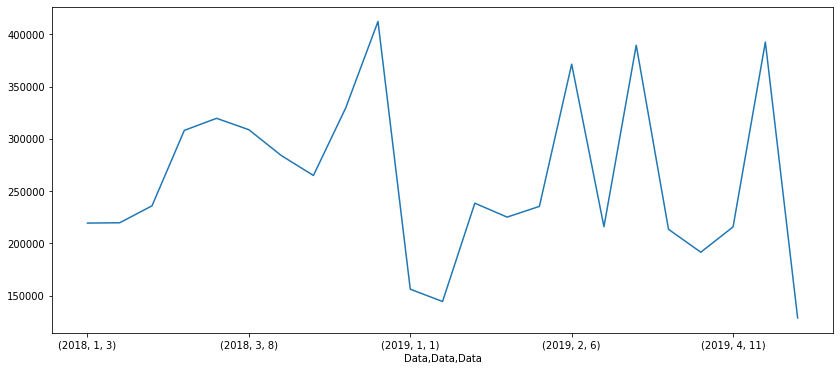

In [83]:
#Grafico do faturamento liquido
plt.figure(figsize=(14,6))
df.groupby([df['Data'].dt.year, df['Data'].dt.quarter,  df['Data'].dt.month])['fatliq'].sum().plot()

<AxesSubplot:ylabel='Produto'>

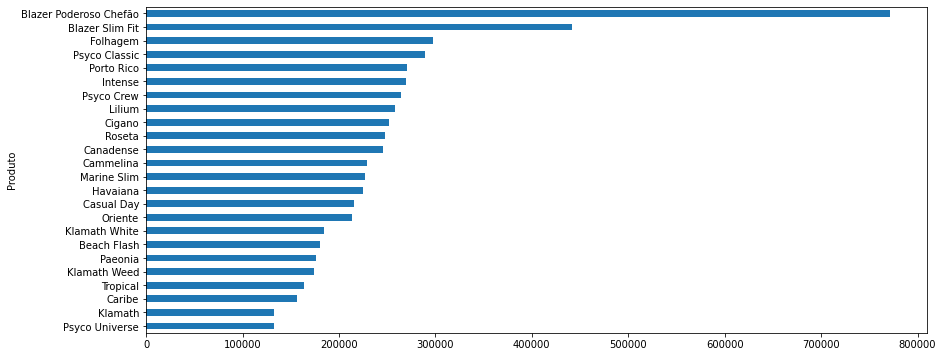

In [87]:
#Grafico faturamento liquido por Produto
plt.figure(figsize=(14,6))
df.groupby(df['Produto'])['fatliq'].sum().sort_values().plot.barh()

In [95]:
#Comparativo faturamento liquido por ano
df.groupby([df['Data'].dt.year, df['Data'].dt.month])['fatliq'].agg(['sum', 'mean', 'min', 'max'])

sum        mean   min    max
Data Data                                    
2018 3     219394.10  137.983711  73.8  490.0
     4     219720.50  137.068309  73.8  490.0
     5     235937.30  137.172849  73.8  490.0
     6     308107.75  139.668064  73.8  490.0
     7     319652.65  136.370584  73.8  490.0
     8     308740.70  138.200850  73.8  490.0
     9     284134.00  139.623587  73.8  490.0
     10    264955.80  141.385165  73.8  490.0
     11    329578.40  137.668505  73.8  490.0
     12    412315.85  139.060995  73.8  490.0
2019 1     156149.95  155.064499  77.9  490.0
     2     144369.55  158.997302  73.8  490.0
     3     238441.85  188.342694  73.8  490.0
     4     225113.95  189.330488  73.8  490.0
     5     235381.35  191.522661  75.6  490.0
     6     371464.05  176.132788  73.8  490.0
     7     215955.05  185.528393  73.8  490.0
     8     389602.35  171.103360  73.8  490.0
     9     213451.70  191.952968  77.9  490.0
     10    191527.70  183.455651  73.8  490.0
     11    215770.00  186.490925  73.8  490.0
     12    392612.65  177.331820  73.8  490.0
2020 1     128612.80  155.894303  73.8  490.0

<AxesSubplot:xlabel='Data'>

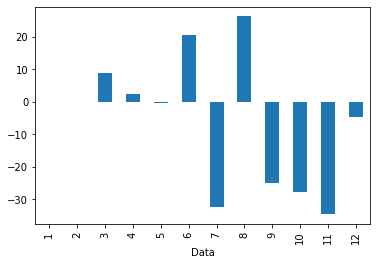

In [106]:
#Variação ano a ano
((df[df['Data'].dt.year == 2019].groupby([df['Data'].dt.month])['fatliq'].sum() - \
df[df['Data'].dt.year == 2018].groupby([df['Data'].dt.month])['fatliq'].sum()) / \
df[df['Data'].dt.year == 2018].groupby([df['Data'].dt.month])['fatliq'].sum() * 100).plot.bar()